In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
#from src.model.naive_benchmark import *
from src.visualization.visualize import MailCenter

import matplotlib.pylab as plt

from src.model.transformer import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from src.model.base_data import Stream,RoyalMail
from src.model.naive_benchmark import *

/Users/cthorey/miniconda2/envs/py27/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/cthorey/miniconda2/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
import shutil

In [ ]:
shutil.rmtree

In [2]:
RM = RoyalMail()

 91%|█████████▏| 94/103 [00:17<00:01,  5.48it/s]


In [6]:
    triples = RM.df[['MC', 'DO', 'stream']].drop_duplicates()
    N = len(triples)
    triples.index = range(0,N)
    print('Forecast for {} triples'.format(N))


Forecast for 12900 triples


In [18]:
for i, MC, DO, stream in tqdm(triples.itertuples(), total=N):
    print i
    sys.exit()

  0%|          | 0/12900 [00:00<?, ?it/s]

0


SystemExit: 

TypeError: 'level' is an invalid keyword argument for this function

In [14]:
for i, MC, DO, stream in tqdm(tuple(triples.to_records), total=N):
    print MC
    sys.exit()

TypeError: 'instancemethod' object is not iterable

In [109]:
stream = Stream(MC='preston mail centre',DO='chorley do',stream='T0076')

pipeline =  Pipeline([
            ('RemoveOutlierTransformer', RemoveOutlierTransformer()),
            ('SundayRemover', SundayTransformer()),
            ('BankHollidayTransformer', BankHollidayTransformer('')),
            ('SimpleFillInputer', SimpleFillInputer(0.0))])

X_train, X_test = stream.train_test_split(pipeline=pipeline)

y_train = X_train.cnt
y_test = X_test.cnt

model = SimpleNaiveModel(DO=stream.DO)
model.fit(X_train)

print('Score on test set')
model.score(X_test, X_test.cnt)

Score on test set


nan

In [110]:
df = X_test.join(model.predict(X_test))
df['day'] = map(lambda x:x.strftime('%A'),df.index)

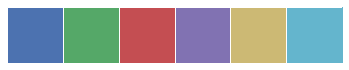

In [51]:
c = sns.color_palette('deep')

In [52]:
c = sns.color_palette('deep')

In [75]:
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=10.0) # this locator puts ticks at regular intervals

In [82]:
import matplotlib.dates as mdates

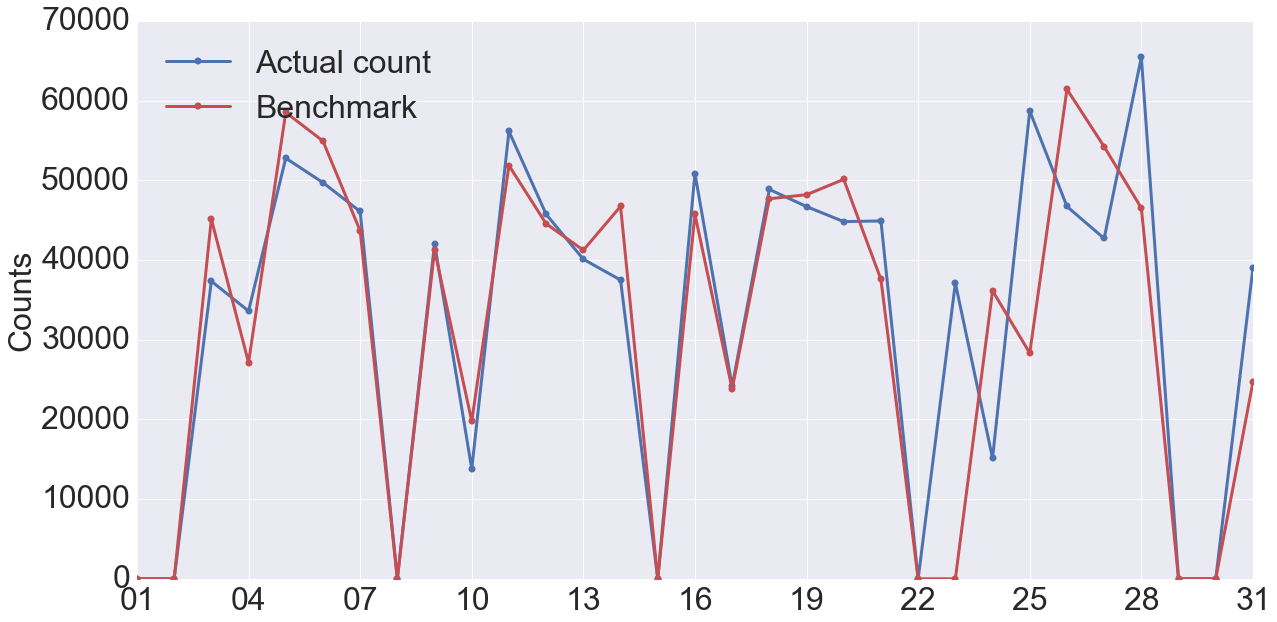

In [111]:
figure = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
df.columns = ['Actual count','Benchmark','day']
#df = df[df.day!='Sunday']
df = df['2016-05']
ax.plot(df['Actual count'],marker='o',c=c[0],lw=3)
ax.plot(df['Benchmark'],marker='o',c=c[2],lw=3)
ax.set_xlabel('',size=32)
ax.set_ylabel('Counts',size=32)
ax.legend(fontsize=32,loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.savefig(os.path.join(FIGURES,'forecast.png'))


In [115]:
def SMAPE(y,yhat):
    return np.nanmean(np.abs(y-yhat)/((y+yhat)/2.0))*100

In [116]:
df = df[df.day!='Sunday']

In [117]:
SMAPE(df['Actual count'],df['Benchmark'])

27.792644080535727